# Exploration des Données - Consommation Électrique Maroc
## Notebook 01: Analyse Exploratoire
### **Objectif** : Comprendre le dataset et préparer la modélisation



In [ ]:
# Importations des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuration de l'affichage
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Bibliothèques importées")

# Chargement des données
print("📂 Chargement du dataset...")
df = pd.read_csv('data/maroc_monthly_2000_2023.csv')
print("✅ Dataset chargé avec succès!")

✅ Bibliothèques importées
📂 Chargement du dataset...
✅ Dataset chargé avec succès!


## 1. PREMIERE INSPECTION 

In [2]:
print("🔍 Inspection initiale du dataset:")
print(f"Shape: {df.shape}")
print(f"Colonnes: {df.columns.tolist()}")

# %%
# Aperçu des données
print("\n📊 Aperçu des données:")
df.head(10)

# %%
# Informations sur les types de données
print("\n📋 Informations sur les types:")
df.info()

# %%
# Statistiques descriptives
print("\n📈 Statistiques descriptives:")
df.describe()

# %%
# Vérification des valeurs manquantes
print("\n🔎 Valeurs manquantes par colonne:")
missing_data = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Valeurs_manquantes': missing_data,
    'Pourcentage': missing_percent
})
print(missing_df)

🔍 Inspection initiale du dataset:
Shape: (288, 7)
Colonnes: ['year', 'month', 'fossil_pct', 'oil_pct', 'renewables_kWh', 'temperature', 'electricity_consumption_GWh']

📊 Aperçu des données:

📋 Informations sur les types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   year                         288 non-null    int64  
 1   month                        288 non-null    int64  
 2   fossil_pct                   288 non-null    float64
 3   oil_pct                      288 non-null    float64
 4   renewables_kWh               288 non-null    float64
 5   temperature                  288 non-null    float64
 6   electricity_consumption_GWh  288 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 15.9 KB

📈 Statistiques descriptives:

🔎 Valeurs manquantes par colonne:
                             Valeurs_

## 2. ANALYSE TEMPORELLE

In [3]:
# Création de la colonne date
df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['month'].astype(str) + '-01')
df = df.sort_values('date').reset_index(drop=True)

print(f"✅ Colonne temporelle créée: {df['date'].min()} to {df['date'].max()}")

# %%
# Vérification de la plage temporelle
print(f"\n📅 Plage temporelle du dataset:")
print(f"Début: {df['date'].min()}")
print(f"Fin: {df['date'].max()}")
print(f"Durée: {(df['date'].max() - df['date'].min()).days / 365.25:.1f} années")
print(f"Nombre d'observations: {len(df)} mois")

✅ Colonne temporelle créée: 2000-01-01 00:00:00 to 2023-12-01 00:00:00

📅 Plage temporelle du dataset:
Début: 2000-01-01 00:00:00
Fin: 2023-12-01 00:00:00
Durée: 23.9 années
Nombre d'observations: 288 mois


## 3. ANALYSE DE LA TARGET (CONSOMMATION ELECTRIQUE)

🎯 Variable cible: electricity_consumption_GWh


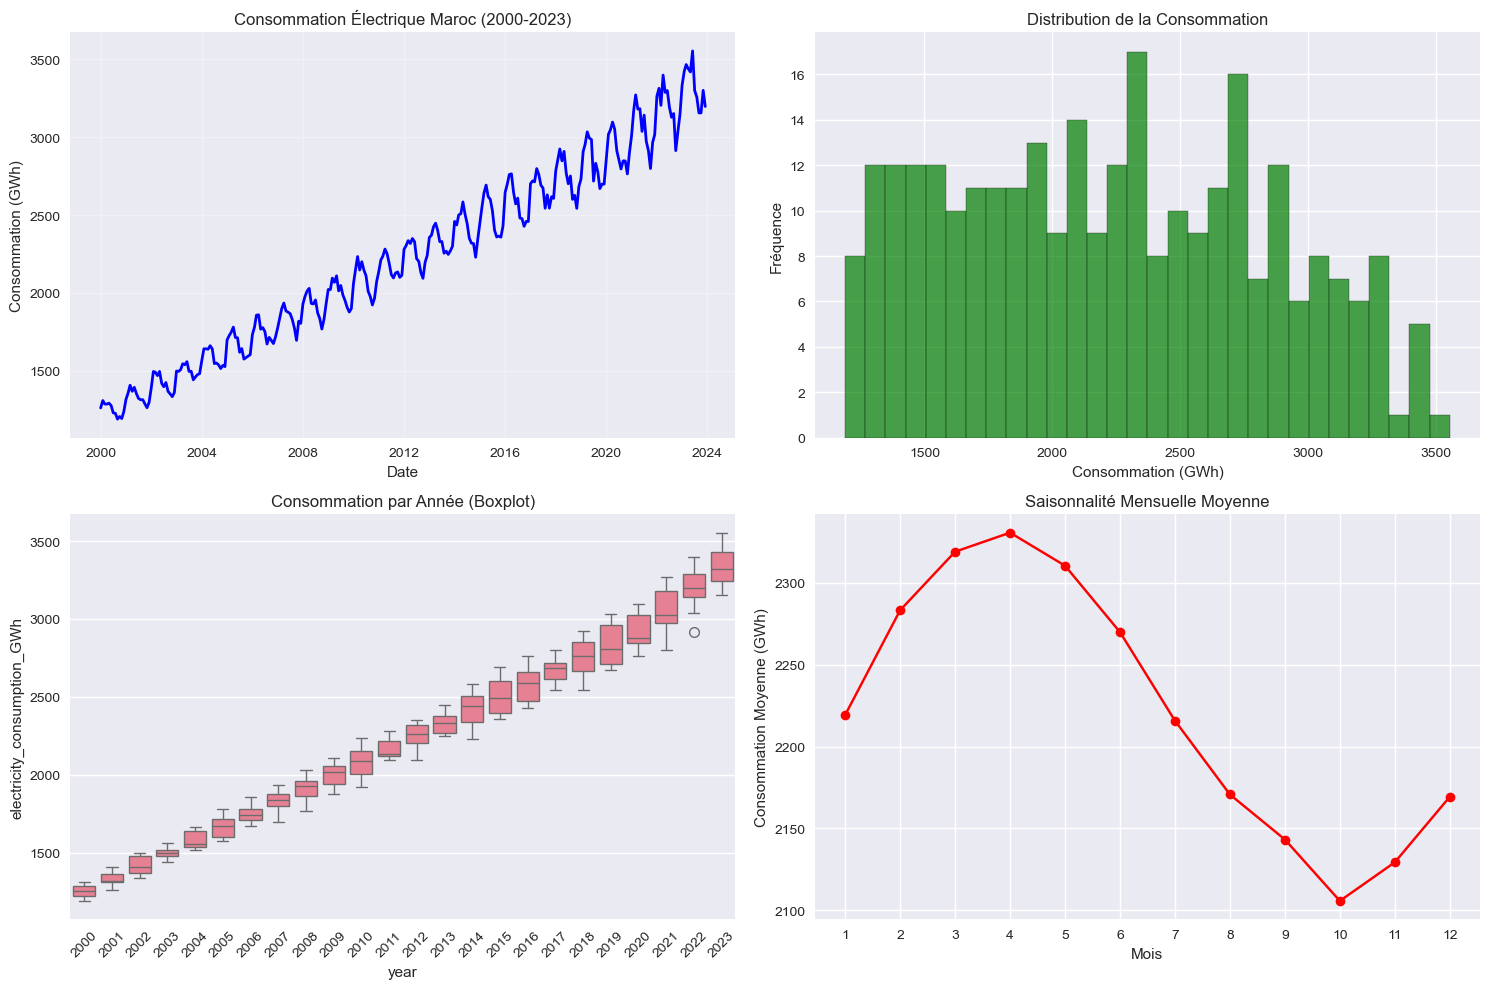


📊 Statistiques de la consommation électrique:
Moyenne: 2222.22 GWh
Médiane: 2215.84 GWh
Std: 607.13 GWh
Min: 1189.86 GWh
Max: 3553.74 GWh
Croissance totale: 153.4%


In [4]:
target_col = 'electricity_consumption_GWh'
print(f"🎯 Variable cible: {target_col}")

# %%
# Analyse de la consommation électrique
plt.figure(figsize=(15, 10))

# Plot 1: Série temporelle complète
plt.subplot(2, 2, 1)
plt.plot(df['date'], df[target_col], linewidth=2, color='blue')
plt.title('Consommation Électrique Maroc (2000-2023)')
plt.xlabel('Date')
plt.ylabel('Consommation (GWh)')
plt.grid(True, alpha=0.3)

# Plot 2: Distribution
plt.subplot(2, 2, 2)
plt.hist(df[target_col], bins=30, alpha=0.7, edgecolor='black', color='green')
plt.title('Distribution de la Consommation')
plt.xlabel('Consommation (GWh)')
plt.ylabel('Fréquence')

# Plot 3: Boxplot par année
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='year', y=target_col)
plt.title('Consommation par Année (Boxplot)')
plt.xticks(rotation=45)

# Plot 4: Saisonnalité mensuelle
plt.subplot(2, 2, 4)
monthly_avg = df.groupby('month')[target_col].mean()
plt.plot(monthly_avg.index, monthly_avg.values, marker='o', color='red')
plt.title('Saisonnalité Mensuelle Moyenne')
plt.xlabel('Mois')
plt.ylabel('Consommation Moyenne (GWh)')
plt.xticks(range(1, 13))

plt.tight_layout()
plt.show()

# %%
# Statistiques de la target
print(f"\n📊 Statistiques de la consommation électrique:")
print(f"Moyenne: {df[target_col].mean():.2f} GWh")
print(f"Médiane: {df[target_col].median():.2f} GWh")
print(f"Std: {df[target_col].std():.2f} GWh")
print(f"Min: {df[target_col].min():.2f} GWh")
print(f"Max: {df[target_col].max():.2f} GWh")
print(f"Croissance totale: {((df[target_col].iloc[-1] / df[target_col].iloc[0]) - 1) * 100:.1f}%")

## 4. ANALYSE DES VARIABLES EXPLICATIVES

🌡️ Variables explicatives: ['temperature', 'fossil_pct', 'oil_pct', 'renewables_kWh']


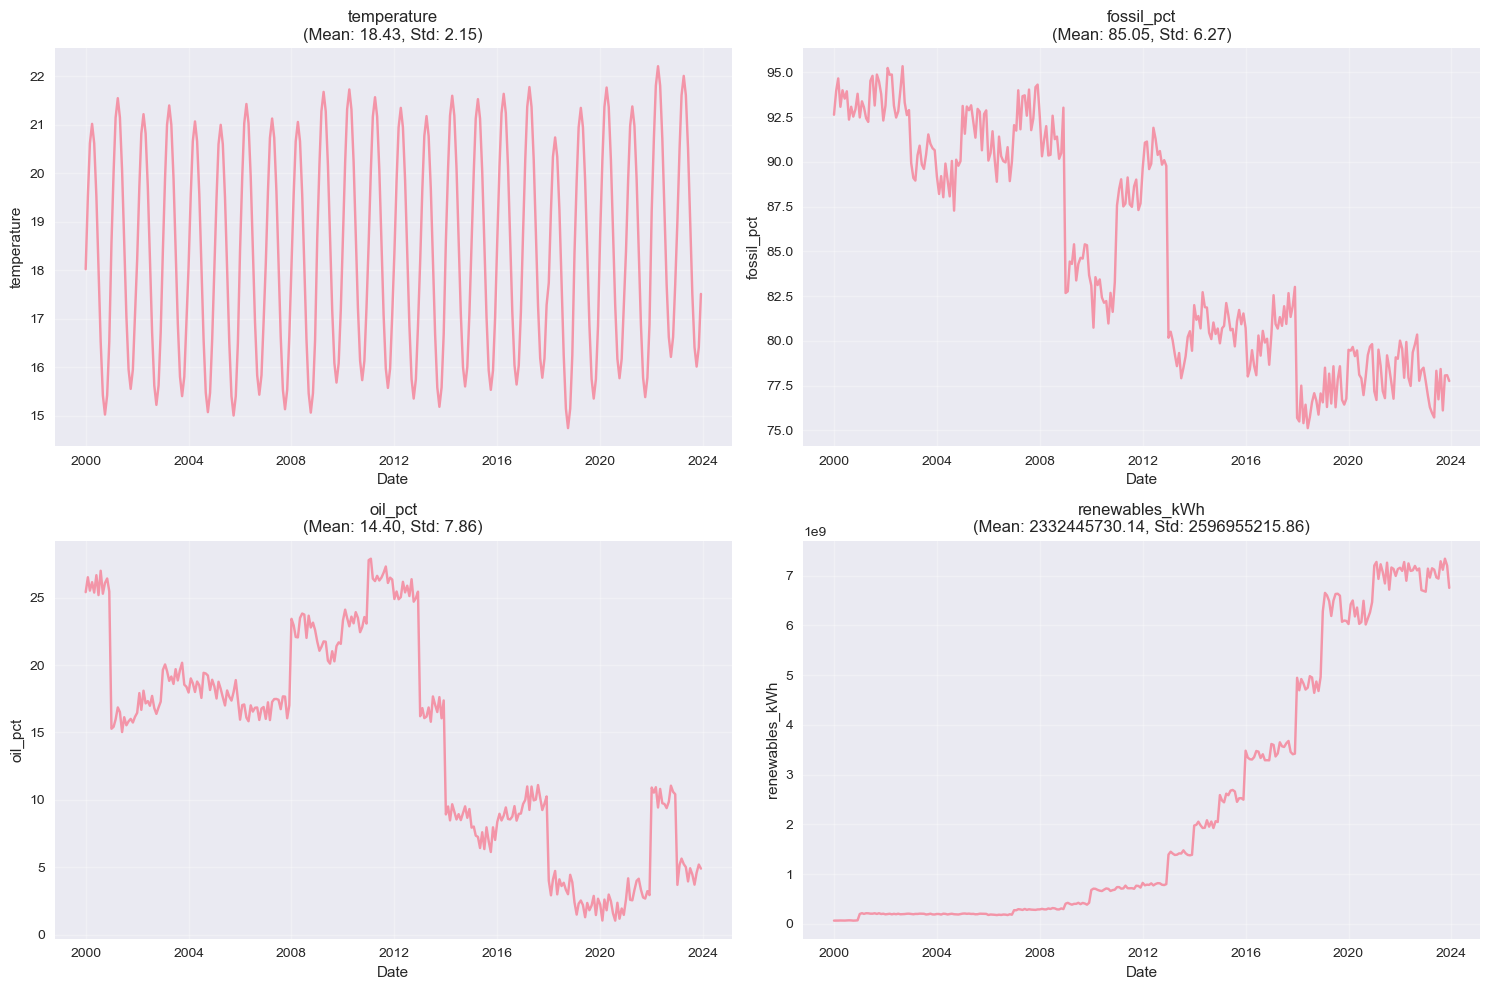

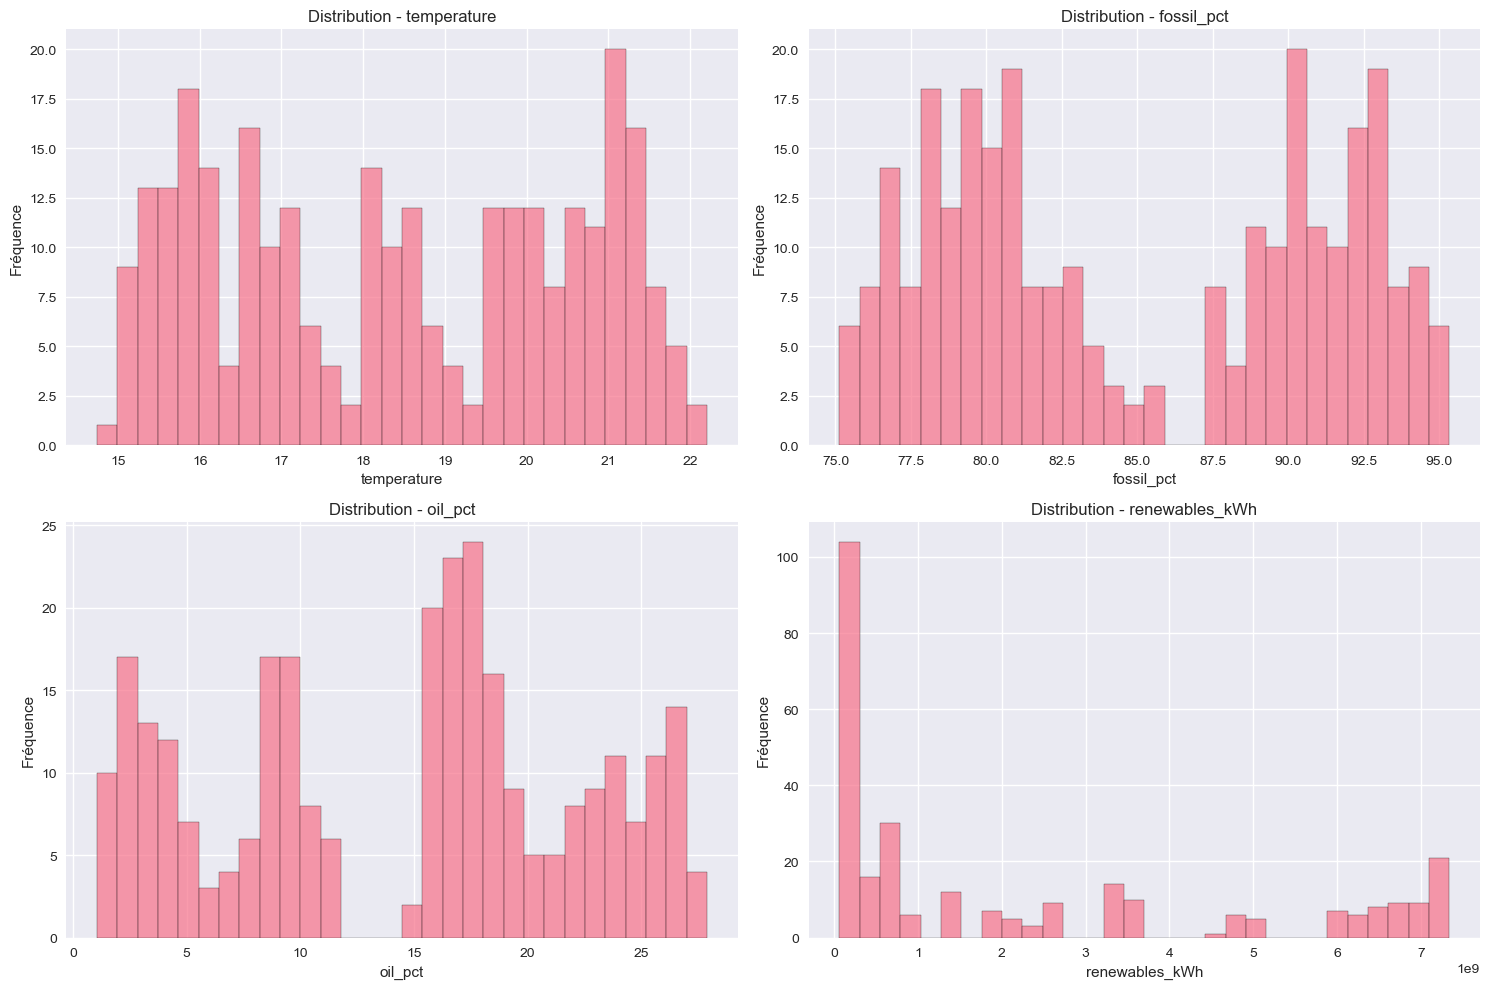

In [5]:
features = ['temperature', 'fossil_pct', 'oil_pct', 'renewables_kWh']
print(f"🌡️ Variables explicatives: {features}")

# %%
# Analyse des variables météo et énergie
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(features):
    # Série temporelle
    axes[i].plot(df['date'], df[col], alpha=0.7)
    axes[i].set_title(f'{col} - Évolution Temporelle')
    axes[i].set_xlabel('Date')
    axes[i].set_ylabel(col)
    axes[i].grid(True, alpha=0.3)
    
    # Ajouter les statistiques dans le titre
    axes[i].set_title(f'{col}\n(Mean: {df[col].mean():.2f}, Std: {df[col].std():.2f})')

plt.tight_layout()
plt.show()

# %%
# Distributions des variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(features):
    axes[i].hist(df[col], bins=30, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Distribution - {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Fréquence')

plt.tight_layout()
plt.show()


## 5. ANALYSE DES CORRELATIONS

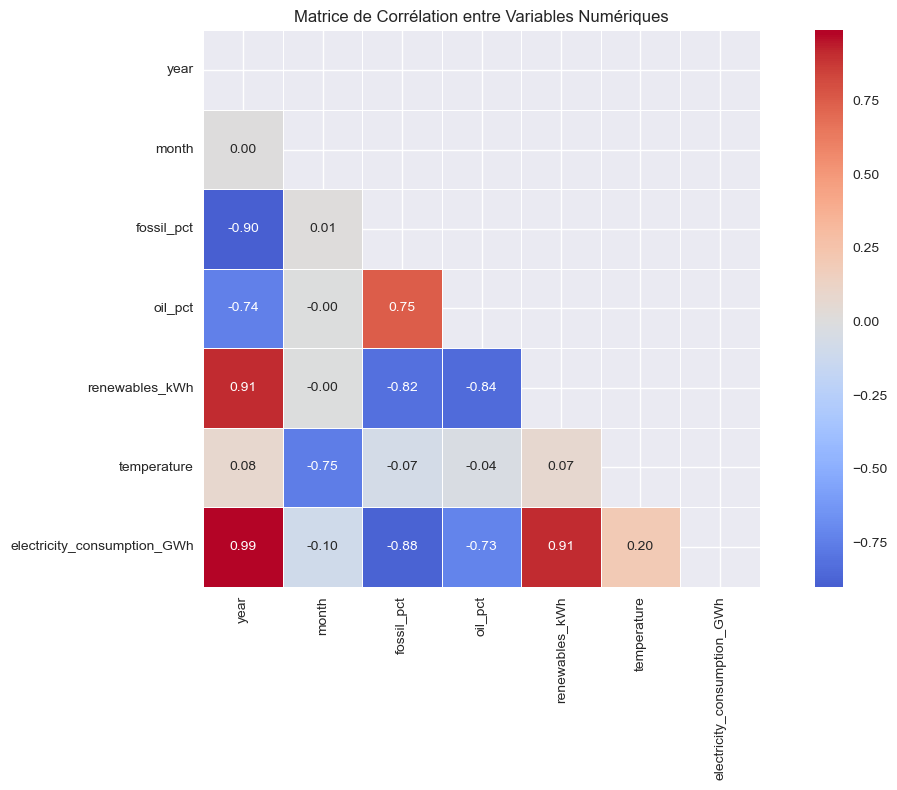


🔗 Corrélations avec la consommation électrique:
electricity_consumption_GWh    1.000000
year                           0.987641
renewables_kWh                 0.906764
temperature                    0.203764
month                         -0.096357
oil_pct                       -0.729468
fossil_pct                    -0.879206
Name: electricity_consumption_GWh, dtype: float64


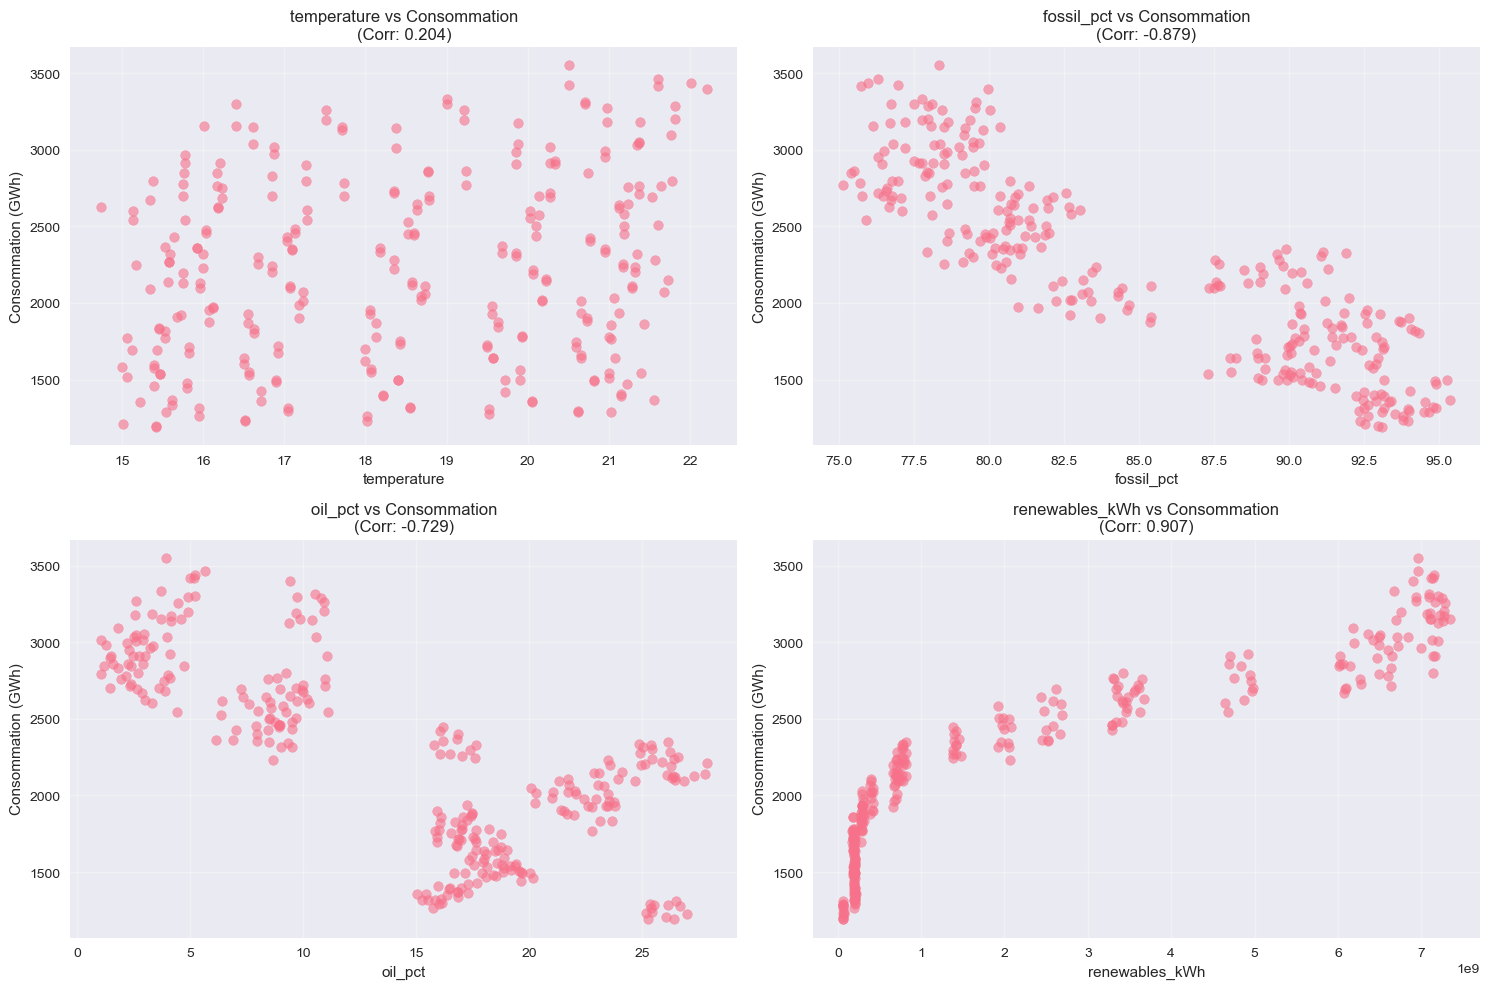

In [6]:
# Matrice de corrélation
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(12, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', linewidths=0.5, mask=mask)
plt.title('Matrice de Corrélation entre Variables Numériques')
plt.tight_layout()
plt.show()

# %%
# Corrélations avec la target
target_correlations = correlation_matrix[target_col].sort_values(ascending=False)
print("\n🔗 Corrélations avec la consommation électrique:")
print(target_correlations)

# %%
# Relations avec la target
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(features):
    axes[i].scatter(df[col], df[target_col], alpha=0.6)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Consommation (GWh)')
    axes[i].set_title(f'{col} vs Consommation\n(Corr: {df[col].corr(df[target_col]):.3f})')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 6. ANALYSE DES VALEURS ABERRANTES


📊 Détection des valeurs aberrantes (outliers):
electricity_consumption_GWh: 0 outliers (0.0%)
temperature: 0 outliers (0.0%)
fossil_pct: 0 outliers (0.0%)
oil_pct: 0 outliers (0.0%)
renewables_kWh: 0 outliers (0.0%)


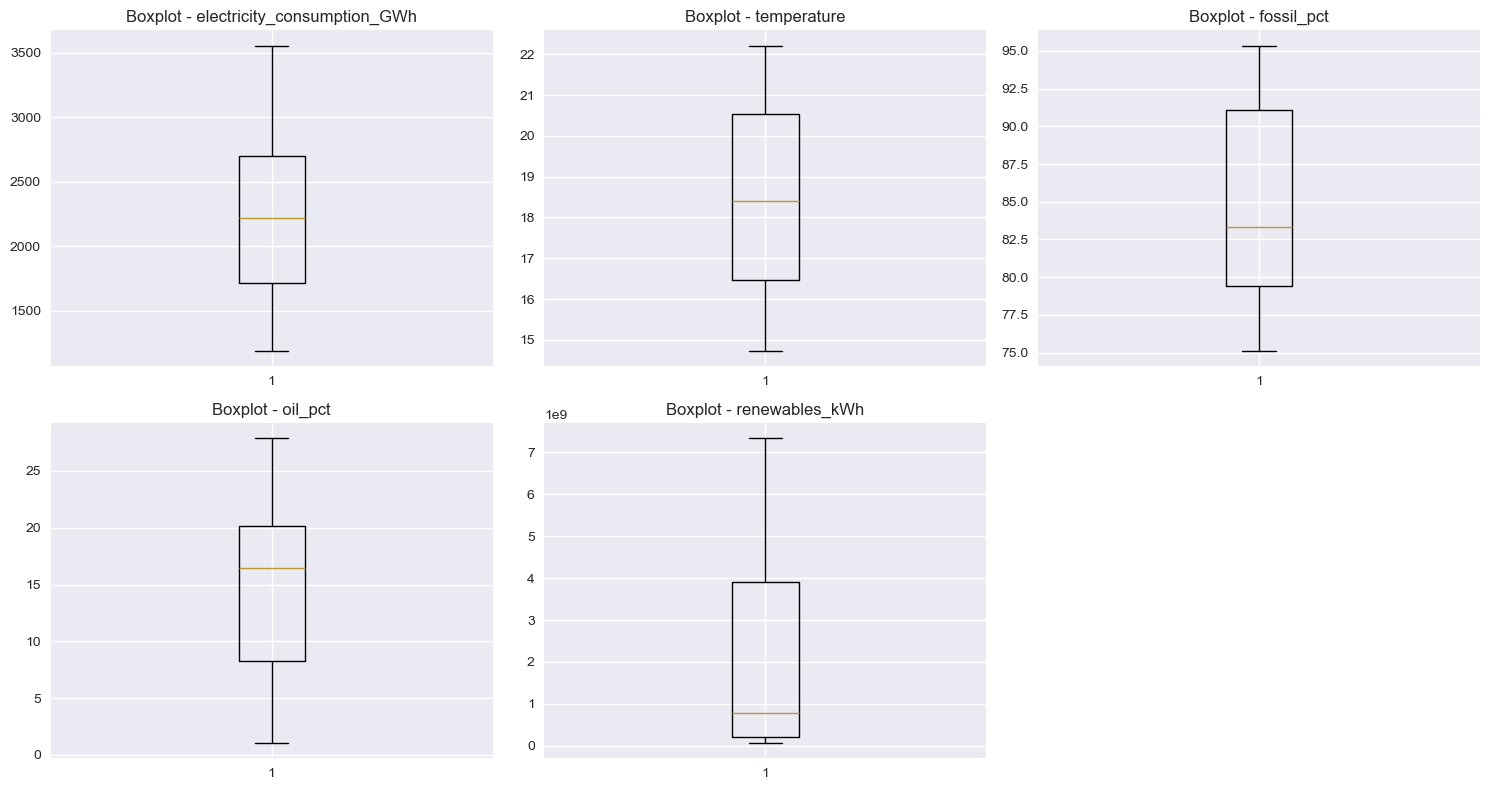

In [7]:
print("\n📊 Détection des valeurs aberrantes (outliers):")

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

columns_to_check = [target_col] + features

for i, col in enumerate(columns_to_check):
    if i < len(axes):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        print(f"{col}: {len(outliers)} outliers ({len(outliers)/len(df)*100:.1f}%)")
        
        # Boxplot
        axes[i].boxplot(df[col].dropna())
        axes[i].set_title(f'Boxplot - {col}')

# Cacher les axes non utilisés
for i in range(len(columns_to_check), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


## 7. ANALYSE DE LA SAISONNALITE


📈 Analyse de la saisonnalité:


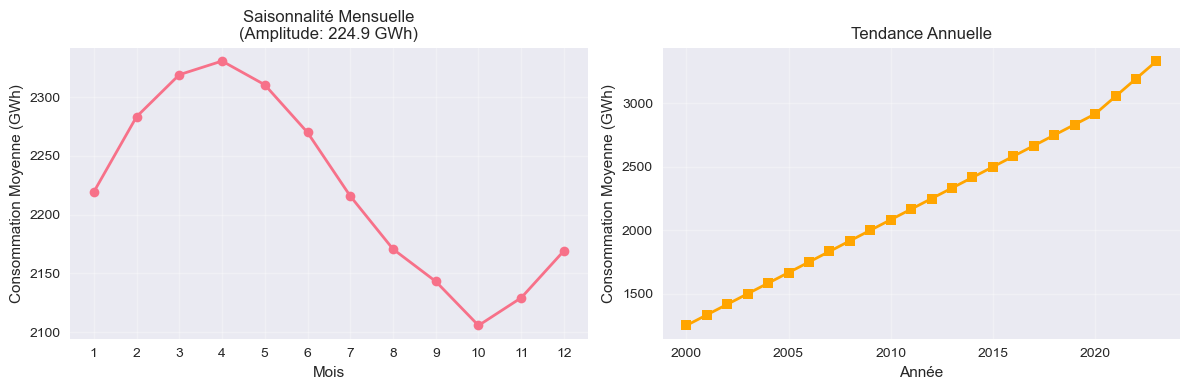

In [8]:
print("\n📈 Analyse de la saisonnalité:")

# Saisonnalité par mois
monthly_pattern = df.groupby('month')[target_col].mean()
seasonal_amplitude = monthly_pattern.max() - monthly_pattern.min()

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(monthly_pattern.index, monthly_pattern.values, marker='o', linewidth=2)
plt.title(f'Saisonnalité Mensuelle\n(Amplitude: {seasonal_amplitude:.1f} GWh)')
plt.xlabel('Mois')
plt.ylabel('Consommation Moyenne (GWh)')
plt.xticks(range(1, 13))
plt.grid(True, alpha=0.3)

# Saisonnalité par année
plt.subplot(1, 2, 2)
yearly_avg = df.groupby('year')[target_col].mean()
plt.plot(yearly_avg.index, yearly_avg.values, marker='s', linewidth=2, color='orange')
plt.title('Tendance Annuelle')
plt.xlabel('Année')
plt.ylabel('Consommation Moyenne (GWh)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. PREPARATION POUR LE SPLIT TRAIN/TEST


📊 Split Train/Test:
Période d'entraînement: 2000-2018 (228 mois)
Période de test: 2019-2023 (60 mois)
Ratio train/test: 79.2% / 20.8%


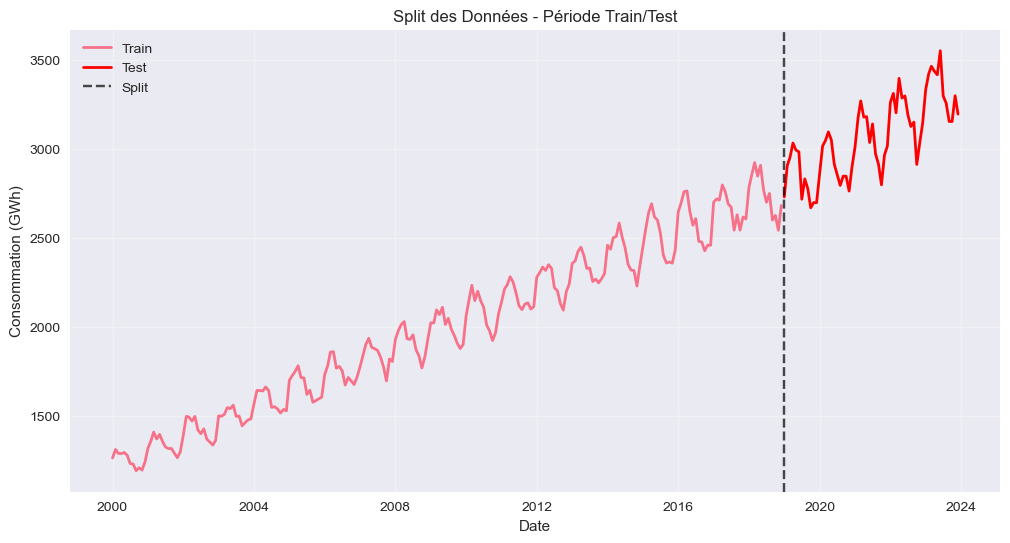

In [9]:
# Définition des périodes
train_start = 2000
train_end = 2018
test_start = 2019
test_end = 2023

train_data = df[df['year'] <= train_end]
test_data = df[df['year'] >= test_start]

print(f"\n📊 Split Train/Test:")
print(f"Période d'entraînement: {train_start}-{train_end} ({len(train_data)} mois)")
print(f"Période de test: {test_start}-{test_end} ({len(test_data)} mois)")
print(f"Ratio train/test: {len(train_data)/len(df)*100:.1f}% / {len(test_data)/len(df)*100:.1f}%")

# %%
# Visualisation du split
plt.figure(figsize=(12, 6))
plt.plot(train_data['date'], train_data[target_col], label='Train', linewidth=2)
plt.plot(test_data['date'], test_data[target_col], label='Test', linewidth=2, color='red')
plt.axvline(x=pd.Timestamp('2019-01-01'), color='black', linestyle='--', alpha=0.7, label='Split')
plt.title('Split des Données - Période Train/Test')
plt.xlabel('Date')
plt.ylabel('Consommation (GWh)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 9. CONCLUSIONS ET RECOMMANDATIONS

In [12]:
print("\n" + "="*50)
print("🎯 CONCLUSIONS ET RECOMMANDATIONS POUR LA MODELISATION")
print("="*50)

print(f"\n📈 **Tendance**: Croissance forte de {df[target_col].iloc[0]:.0f} à {df[target_col].iloc[-1]:.0f} GWh")
print(f"📅 **Saisonnalité**: Pattern mensuel détecté (amplitude: {seasonal_amplitude:.1f} GWh)")
print(f"🔗 **Corrélations importantes**:")
for col, corr in target_correlations.items():
    if col != target_col and abs(corr) > 0.3:
        print(f"   - {col}: {corr:.3f}")

print(f"\n💡 **Recommandations pour le feature engineering**:")
print("   - Créer des features de lag (décalages temporels)")
print("   - Ajouter des variables saisonnières (mois, trimestre)")
print("   - Normaliser les variables pour LSTM")
print("   - Considérer des moyennes mobiles")

print(f"\n⚡ **Prochaines étapes**:")
print("   - 02_feature_engineering.ipynb: Création des features")
print("   - 03_prophet_model.ipynb: Modèle Prophet")
print("   - 04_lstm_model.ipynb: Modèle LSTM")

# %%
# Sauvegarde des données analysées
df.to_csv('data/maroc_monthly_2000_2023_analysed.csv', index=False)
print("\n💾 Données analysées sauvegardées!")

print("\n✅ Analyse exploratoire terminée avec succès!")


🎯 CONCLUSIONS ET RECOMMANDATIONS POUR LA MODELISATION

📈 **Tendance**: Croissance forte de 1262 à 3197 GWh
📅 **Saisonnalité**: Pattern mensuel détecté (amplitude: 224.9 GWh)
🔗 **Corrélations importantes**:
   - year: 0.988
   - renewables_kWh: 0.907
   - oil_pct: -0.729
   - fossil_pct: -0.879

💡 **Recommandations pour le feature engineering**:
   - Créer des features de lag (décalages temporels)
   - Ajouter des variables saisonnières (mois, trimestre)
   - Normaliser les variables pour LSTM
   - Considérer des moyennes mobiles

⚡ **Prochaines étapes**:
   - 02_feature_engineering.ipynb: Création des features
   - 03_prophet_model.ipynb: Modèle Prophet
   - 04_lstm_model.ipynb: Modèle LSTM

💾 Données analysées sauvegardées!

✅ Analyse exploratoire terminée avec succès!
